# Desafio de Regressão (Tera & QuintoAndar)

Lucas Fiorani Diniz

**Descrição**: Resolução do case de precificação de imóveis do curso de Data Science & Machine Learning da Tera, em parceria com o QuintoAndar. O desafio possui dois objetivos principais, o primeiro focado em interpretabilidade dos coeficientes e geração de insights e o segundo em alto poder preditivo do modelo.

## Base de dados

O conjunto de dados é composto por 1460 observações correspondentes a vendas de propriedades residenciais americanas no período de 2006 a 2010. A base possui um total de 80 variáveis explicativas e o preço das vendas ("PrecoVenda") é a variável dependente.

In [1]:
import pandas as pd

df = pd.read_csv('base.csv')
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

## Análise exploratória dos dados (EDA)

Das informações do dataset vistas acima, é possível depreender que algumas colunas possuem um número significativo de valores faltantes, como é o caso de "Beco", "QualidadePiscina", "QualidadeCerca" e "Outros". Podemos verificar a distribuição da variável de interesse abaixo:

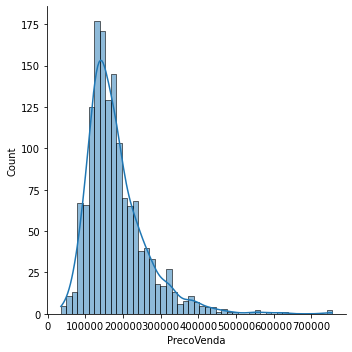

In [3]:
import seaborn as sns

sns.displot(df['PrecoVenda'], kde=True);

A distribuição do *target* "PrecoVenda" é exponencial. Sendo assim, uma boa prática para os próximos passos seria aproximá-la de uma distribuição normal (ou gaussiana) através de uma transformação logarítmica.

É interessante separar as features por categorias, como por exemplo quantitivas (contínuas e discretas) e qualitativas (nominais e ordinais). As features contínuas estão relacionadas com as dimensões de área para cada imóvel. As features discretas quantificam o número de itens que existem na casa. As features nominais identificam categorias de moradias, garagens, materiais, entre outros. Por fim, as features ordinais classificam vários itens na propriedade.

Com base no glossário das variáveis disponibilizado no desafio, foi possível separá-las correntamente:

In [4]:
var_con = ['Fachada', 'TamanhoLote', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 
           'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'AreaGaragem', 
           'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 
           'AreaPiscina', 'ValorOutros']

var_dis = ['Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 
           'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'MesVenda',
           'AnoVenda']

var_nom = ['ClasseImovel', 'ClasseZona', 'Rua', 'Beco', 'PlanoProp', 'Servicos', 'ConfigLote', 'Bairro', 
           'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado',
           'Exterior1', 'Exterior2', 'TipoAlvenaria', 'TipoFundacao', 'TipoAcabPorao1', 'TipoAcabPorao2',
           'Aquecimento', 'ArCentral', 'InstalacaoEletrica', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem', 
           'Outros', 'TipoVenda', 'CondicaoVenda']

var_ord = ['FormaProp', 'InclinacaoLote', 'QualidadeCobertura', 'CondicaoExterna', 'AlturaPorao', 'CondicaoPorao', 
           'ParedePorao', 'QualidadeAquecimento', 'QualidadeCozinha', 'QualdiadeLareira', 'QualidadeGaragem', 
           'CondicaoGaragem', 'EntradaPavimentada', 'QualidadePiscina', 'QualidadeCerca']

### Variáveis contínuas

Primeiro serão analisadas as variáveis contínuas do problema, através de algumas estatísticas descritivas:

In [5]:
df[var_con].describe()

,Fachada,TamanhoLote,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


É possível perceber que em algumas séries mais de 75% dos valores são iguais a zero. Essas features serão por hora desconsideradas da análise, e a matriz de correlação de Pearson calculada para as features remanescentes:

In [6]:
var_con_selected = []
for var in var_con:
    if df[var].quantile(.75) > 0.0:
        var_con_selected.append(var)

<AxesSubplot:>

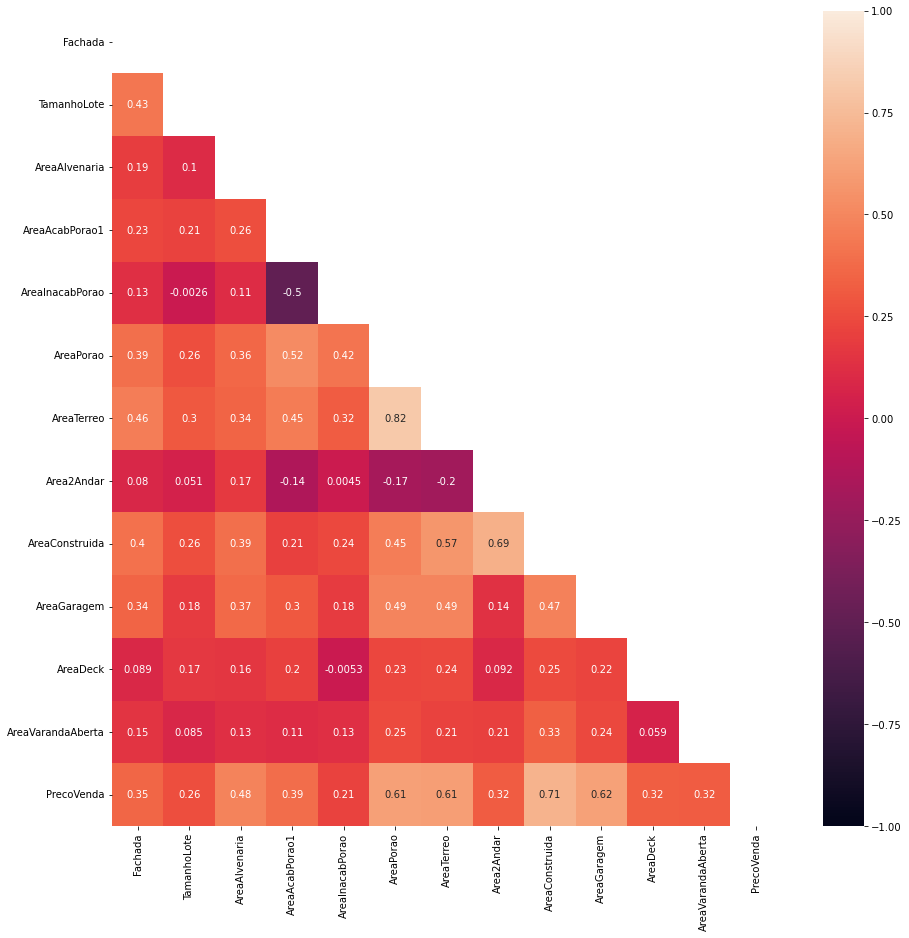

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,15))
sns.heatmap(df[var_con_selected+['PrecoVenda']].corr(), vmin=-1, vmax=+1, annot=True, 
            mask=np.triu(df[var_con_selected+['PrecoVenda']].corr()))

Considerando que uma correlação de Pearson forte teria valor, em módulo, superior a 0.6, as features "AreaPorao", "AreaTerreo", "AreaConstruida" e "AreaGaragem" apresentaram forte correlação com a variável resposta. Abaixo, essas features são examinadas mais de perto:

<AxesSubplot:>

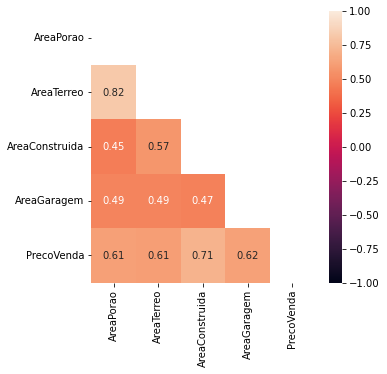

In [8]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['AreaPorao','AreaTerreo','AreaConstruida','AreaGaragem','PrecoVenda']].corr(), 
            vmin=-1, vmax=+1, annot=True, 
            mask=np.triu(df[['AreaPorao','AreaTerreo','AreaConstruida','AreaGaragem','PrecoVenda']].corr()))

Existe uma correlação significativa entre todas essas variáveis, porém a que chama mais atenção ocorre entre "AreaTerreo" e "AreaPorao", sendo essa de 0.82. Não seria uma boa ideia, para esse caso, utilizar as duas variáveis em conjunto em um modelo de regressão linear, devido ao pressuposta da ausência de multicolinearidade. Os scatterplots dessas variáveis com a variável resposta podem ser vistos abaixo:

In [9]:
# Função para plotar gráficos
def plota_graficos(df, features, target, N, width=20, height=10):
    
    if len(features) % 2 == 0: n_lin = len(features)//2
    else: n_lin = len(features)//2 + 1
    
    lin, col = 0, 0
    fig, axes = plt.subplots(n_lin,2,figsize=(width,height))

    for var in features:
        if len(df[var].unique()) <= N:
            sns.boxplot(x=df[var], y=df[target], ax=axes[lin, col])

        else:
            sns.scatterplot(x=df[var], y=df[target], ax=axes[lin, col])

        if col == 1:
            lin = lin + 1
            col = 0
        else: col = col + 1

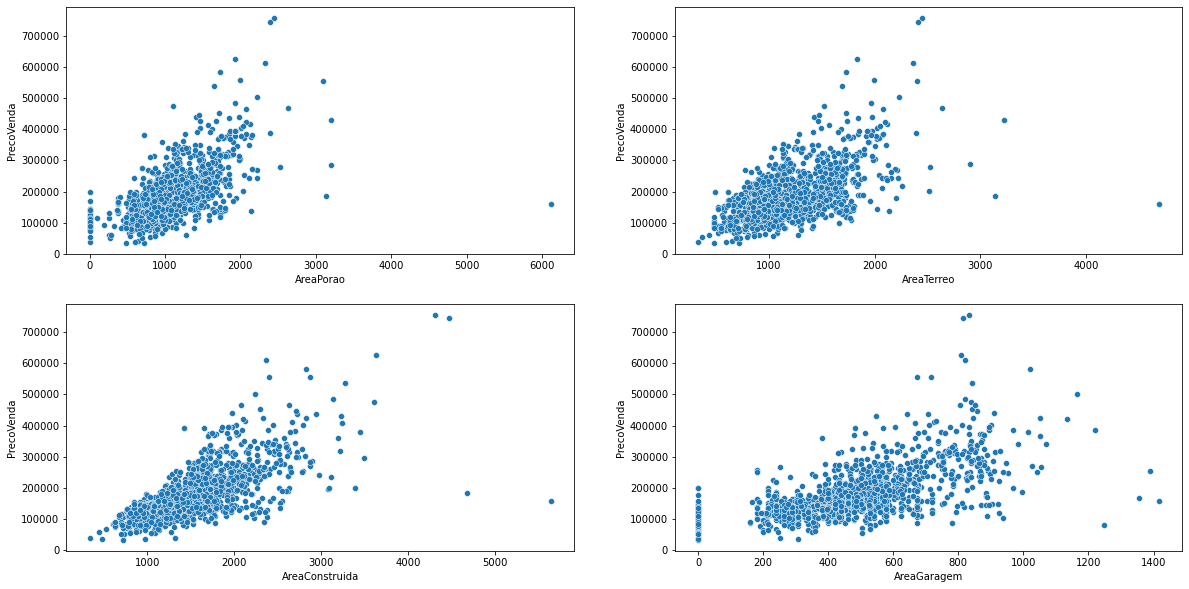

In [10]:
plota_graficos(df,['AreaPorao','AreaTerreo','AreaConstruida','AreaGaragem'],'PrecoVenda',1)

### Variáveis discretas

Como primeiro passo da análise das variáveis discretas, serão analisadas algumas estatísticas descritivas:

In [11]:
df[var_dis].describe()

,Qualidade,Condicao,AnoConstrucao,AnoReforma,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,MesVenda,AnoVenda
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1971.267808,1984.865753,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,6.321918,2007.815753
std,1.382997,1.112799,30.202904,20.645407,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,2.703626,1.328095
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,1.000000,2006.000000
25%,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,5.000000,2007.000000
50%,6.000000,5.000000,1973.000000,1994.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,6.000000,2008.000000
75%,7.000000,6.000000,2000.000000,2004.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,8.000000,2009.000000
max,10.000000,9.000000,2010.000000,2010.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,12.000000,2010.000000


Todas as features parecem ter valores válidos. Para todas as features com mais de 12 valores possíveis, será plotado um scatterplot. Para todas aquelas com menos ou exatamente 12 valores distintos, será plotado um boxplot:

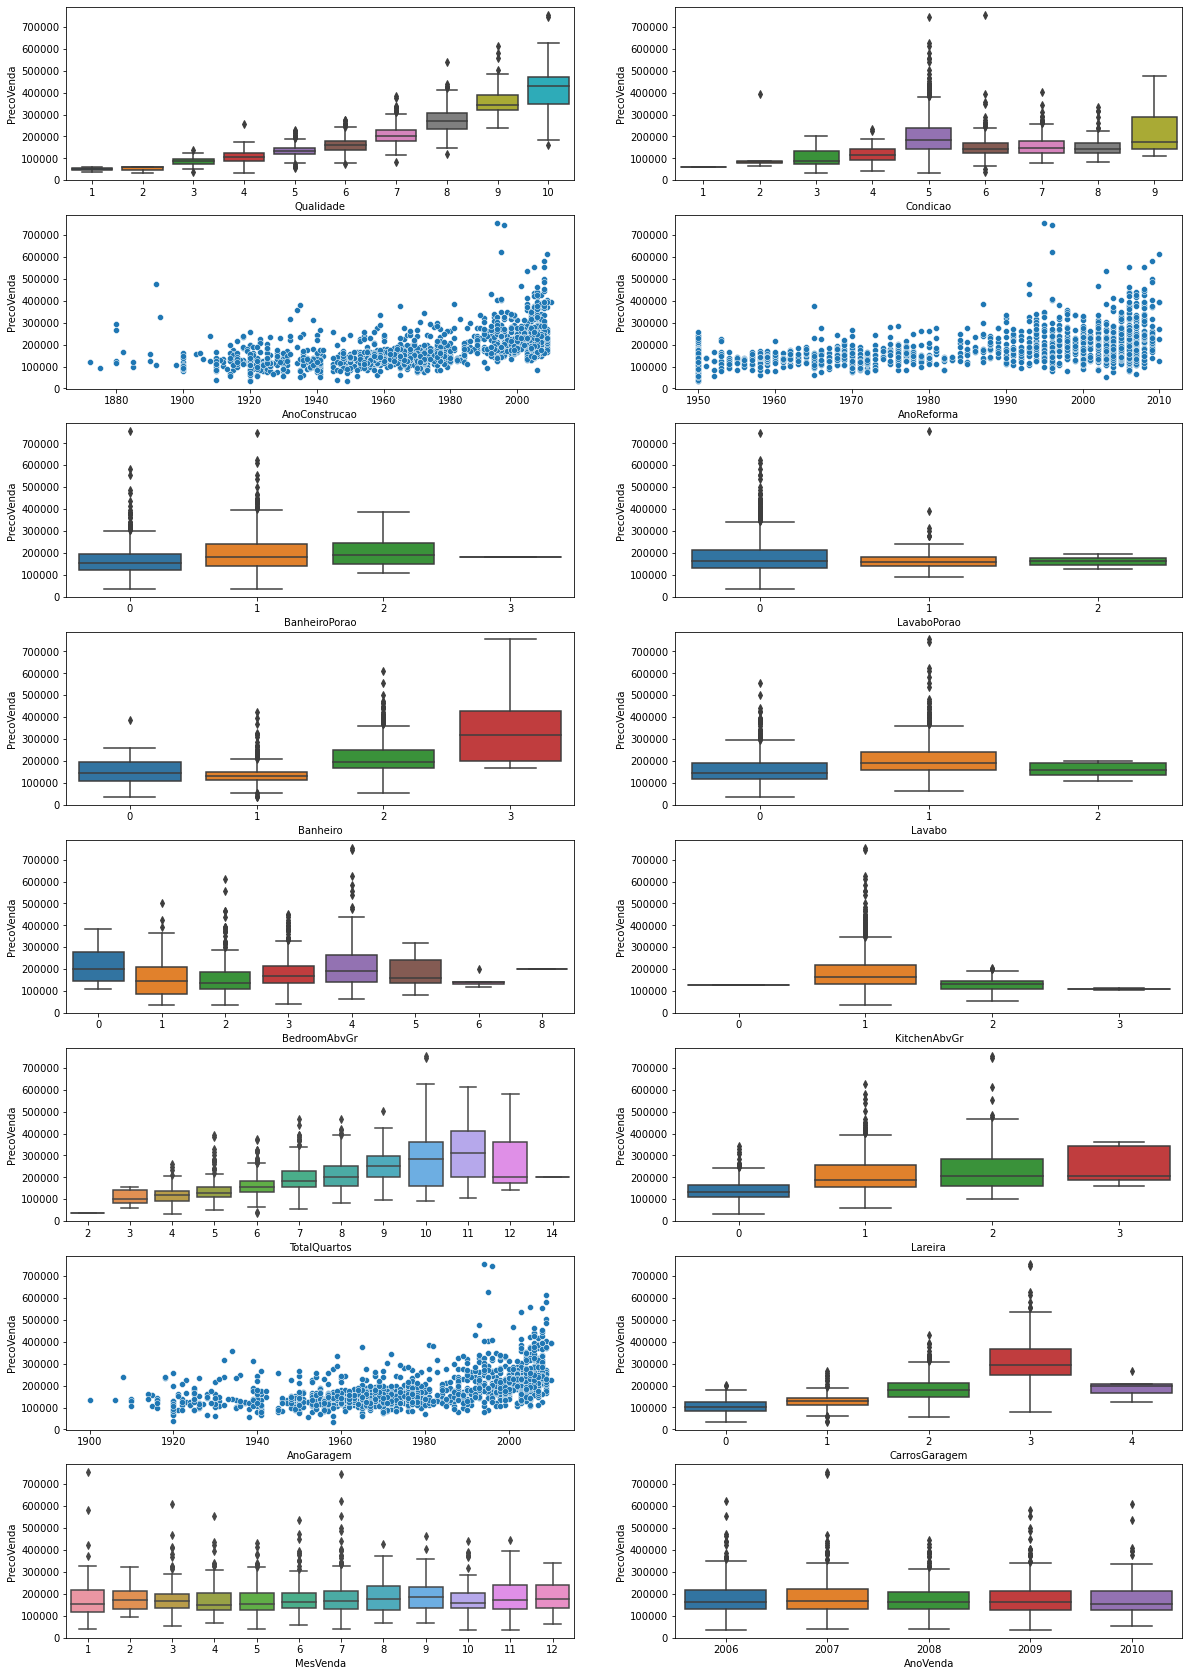

In [12]:
plota_graficos(df, var_dis, 'PrecoVenda', 12, height=30)

Algumas features apresentaram uma boa relação com a variável resposta, com destaque para "Qualidade", "TotalQuartos" e "Lareira".

### Variáveis ordinais

Para cada uma das variáveis ordinais, serão plotados boxplots:

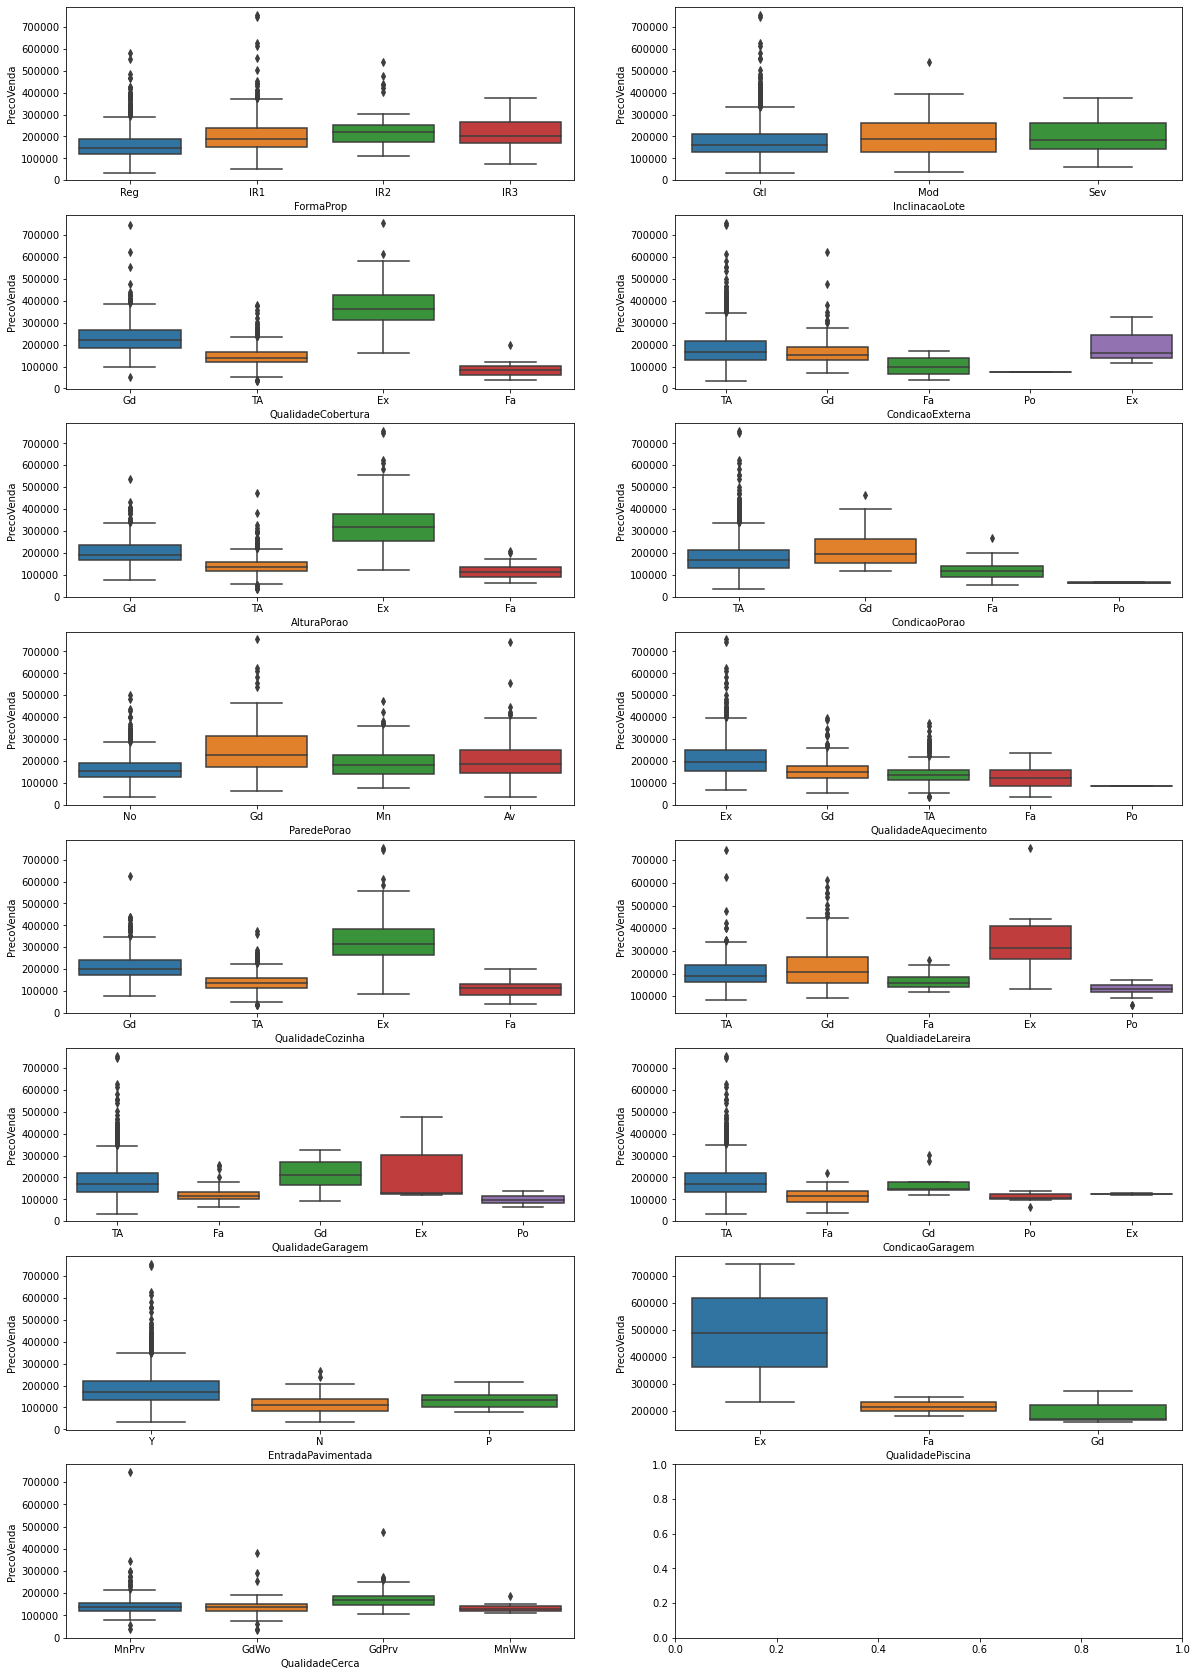

In [13]:
plota_graficos(df, var_ord, 'PrecoVenda', 12, height=30)

Algumas variáveis explicativas ordinais apresentaram uma relação significativa com a variável alvo, com destaque para "QualidadeCobertura", "AlturaPorao" e "QualidadeCozinha". Os parâmetros relacionados à qualidade do imóvel pode ter correlação com a feature "Qualidade" observada anteriormente. Dado que essa possui uma forte relação com a target, é natural imaginar que parâmetros dessa mesma categoria também possuam.

### Variáveis nominais

Devido ao grande número de variáveis nominais presentes no problema (29 ao todo), algumas serão escolhidas de forma deliberada, com base no conhecimento prévio do problema de negócio. Além disso, serão analisados os histogramas dessas variáveis, observando se alguma das classes é dominante ou pouco presente entre as entradas:

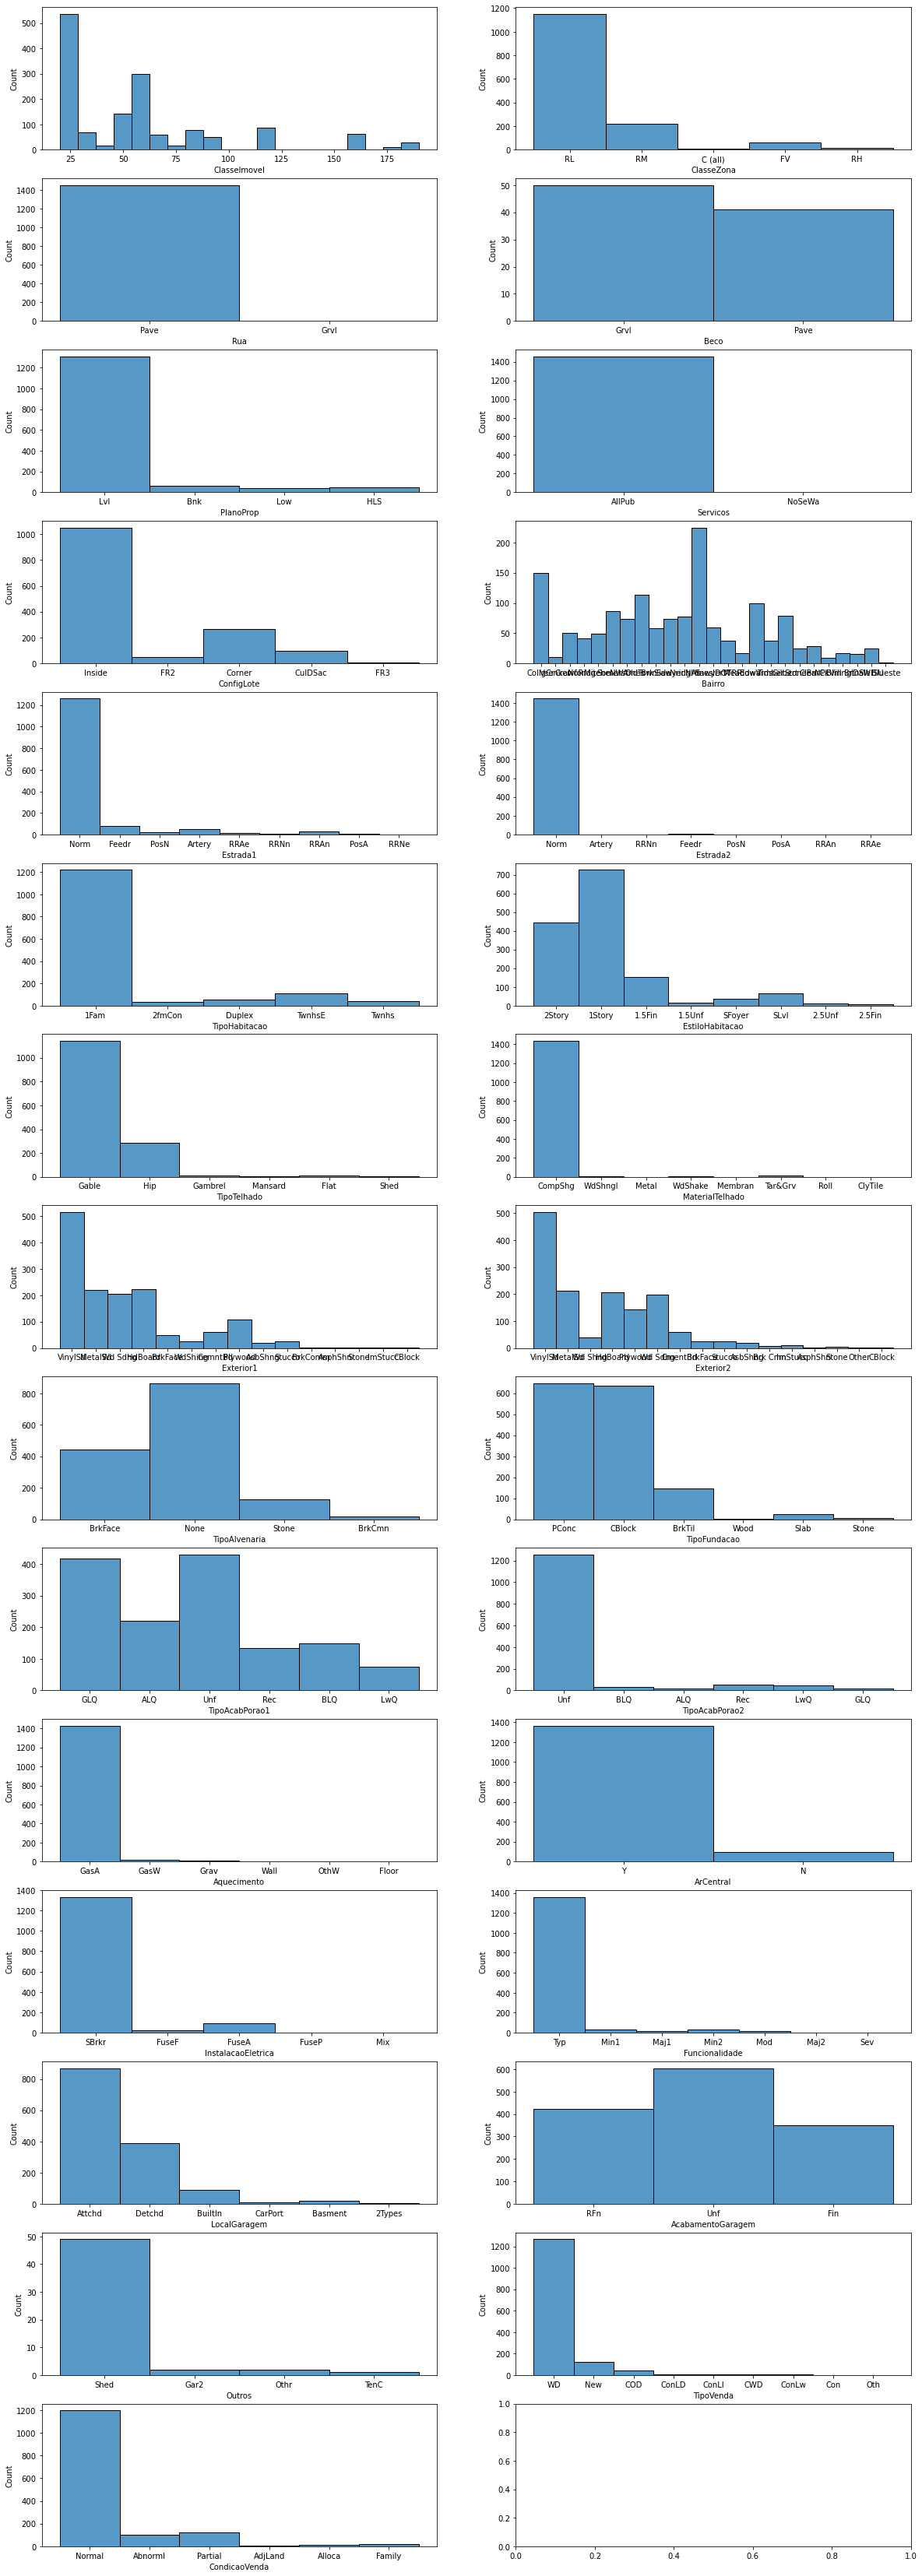

In [14]:
    lin, col = 0, 0
    fig, axes = plt.subplots(15,2,figsize=(20,60))

    for var in var_nom:
        sns.histplot(df[var], ax=axes[lin, col])

        if col == 1:
            lin = lin + 1
            col = 0
        else: col = col + 1

Foram escolhidos para análise as variáveis "Bairro", "Exterior1", "TipoAlvenaria", "TipoFundacao", "TipoAcabaPorao1" e "AcabamentoGaragem":

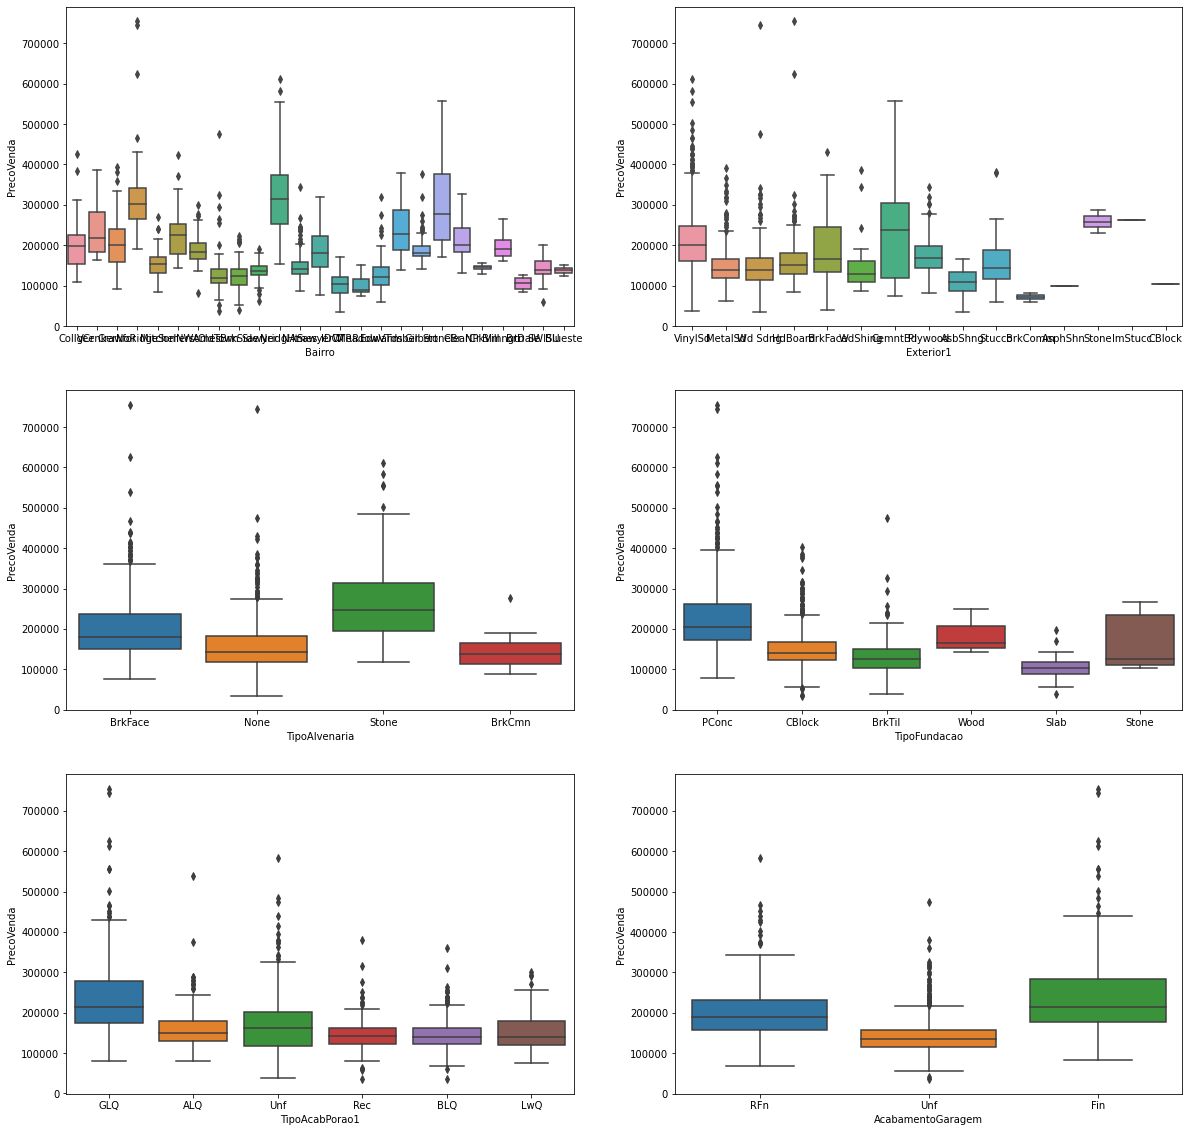

In [15]:
plota_graficos(df, ["Bairro", "Exterior1", "TipoAlvenaria", "TipoFundacao", "TipoAcabPorao1", "AcabamentoGaragem"], 'PrecoVenda', 1000, height=20)

### Interpretação da EDA

A primeira conclusão obtida foi que a área do imóvel, em especial a área construida, está intimamente relacionada com o preço de venda do mesmo. Nessa mesma linha de raciocínio, a área da garagem também parece ser um fator importante, o que é refletido na análise da variável "CarrosGaragem". A condição e qualidade da mesma, no entanto, não parecem ser fatores muito relevantes.

Outro ponto interessante é que os fatores relacionados ao porão, como área e altura, parecem ser importantes na definição do preço de venda. A área do porão possui ainda forte correlação com a área do térreo, o que de certa forma condiz com o esperado. Para a construção de um modelo de regressão linear que atende a seus pressupostos, no entanto, seria necessário escolher apenas uma dessas.

Os fatores de qualidade parecem, em geral, mais importantes do que aqueles relacionados à condição do imóvel. O destaque nesse quesito vai para a variável "Qualidade", "QualidadeCobertura" e "QualidadeCozinha". Fatores relacionados ao aquecimento também parecem interessantes, como "Lareira" e "QualidadeAquecimento".

O número de quartos apresentou boa relação com a target, porém isso deve estar atrelado ao valor de área construída citado anteriormente. Por fim, dentre as variáveis nominais, é possível destacar o bairro do imóvel e o tipo de alvenaria (que nesse caso, pode ter relação com os fatores de qualidade). Todos esses fatores podem ser sintetizados em seis grupos principais:

- Relacionados ao tamanho do imóvel: "AreaConstruida" e "TotalQuartos";
- Relacionados à localização: "Bairro";
- Relacionados à qualidade do imóvel: "Qualidade";
- Relacionados ao porão: "AreaPorao" e "AlturaPorao";
- Relacionados à garagem: "AreaGaragem" e "CarrosGaragem";
- Relacionados ao aquecimento: "Lareira" e "QualidadeAquecimento".

## Pré-processamento dos dados

Será adotado um critério deliberado de que toda coluna com mais da metade de valores faltantes será excluida do dataset:

In [16]:
for var in df.columns:
    if df[var].isnull().sum() > df[var].count():
        df.drop(var,inplace=True,axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

### Criando novas features

A partir da EDA realizada, surgiram algumas ideias de features que podem ser interessantes para o modelo:

- AreaPorQuartos: ao dividir a área construída do imóvel pelo total de quartos, podemos ter um bom indicador. Um imóvel com 60m^2 e um quarto pode ser considerado grande, ao passo em que um com dois quartos seria médio;
- AreaAoQuadrado: essa variável cria maior separação entre os valores de área construída e pode ser interessante para o modelo;
- VolumePorao: como tanto a área quanto a altura são fatores importantes para determinar o preço de venda, pode ser interessante multiplicá-los para gerar uma única variável;
- LareirasPorArea: o número de lareiras por área construída pode ser importante, identificando casos de casas grandes com poucas lareiras, por exemplo; 
- CarrosPorArea: um critério semelheante ao do número de lareiras, visa identificar casas com boa proporção de carros por área construída.

In [17]:
df['AreaPorQuartos'] = df['AreaConstruida']/df['TotalQuartos']
df['AreaAoQuadrado'] = df['AreaConstruida']**2
# Obtendo a altura de porão média da categoria correspondente (convertida de polegadas para pés)
df['AlturaPoraoNum'] = df['AlturaPorao'].replace({'Ex': 8.75,'Gd': 7.92, 'TA': 7.08, 'Fa': 6.25, 'Po': 5.42, 'NA': 0})
df['VolumePorao'] = df['AreaPorao']*df['AlturaPoraoNum']
df['LareirasPorArea'] = df['Lareira']/df['AreaConstruida']
df['CarrosPorArea'] = df['CarrosGaragem']/df['AreaConstruida']

## Objetivo 1: interpretabilidade usando uma regressão linear

O primeiro modelo será formado por apenas 6 features, sendo essas as 5 criadas anteriormente mais a variável explicativa discreta "Qualidade". Serão utilizados apenas os exemplos onde a condição de venda é igual a "Normal", diminuindo o ruído nos dados e facilitando a interpretação do modelo. Não menos importante, uma transformação logarítmica será aplicada sobre a variável dependente:

In [18]:
df['PrecoVendaLog'] = np.log(df['PrecoVenda'])
df_obj1 = df.loc[df['CondicaoVenda']=='Normal'][['AreaPorQuartos', 'AreaAoQuadrado', 'VolumePorao', 'LareirasPorArea', 
                                                 'CarrosPorArea', 'Qualidade', 'PrecoVendaLog']].reset_index(drop=True)
df_obj1.head()

,AreaPorQuartos,AreaAoQuadrado,VolumePorao,LareirasPorArea,CarrosPorArea,Qualidade,PrecoVendaLog
0,213.750000,2924100,6779.52,0.000000,0.001170,7,12.247694
1,210.333333,1592644,9995.04,0.000792,0.001585,6,12.109011
2,297.666667,3189796,7286.40,0.000560,0.001120,7,12.317167
3,244.222222,4831204,9068.40,0.000455,0.001365,8,12.429216
4,272.400000,1855044,6304.32,0.000000,0.001468,5,11.870600


In [19]:
df_obj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaPorQuartos   1198 non-null   float64
 1   AreaAoQuadrado   1198 non-null   int64  
 2   VolumePorao      1166 non-null   float64
 3   LareirasPorArea  1198 non-null   float64
 4   CarrosPorArea    1198 non-null   float64
 5   Qualidade        1198 non-null   int64  
 6   PrecoVendaLog    1198 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 65.6 KB


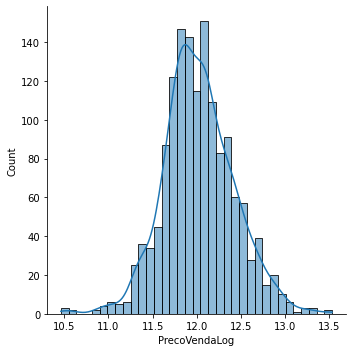

In [20]:
sns.displot(df['PrecoVendaLog'], kde=True);

A nova variável dependente "PrecoVendaLog" tem uma distribuição mais próxima da normal. É possível perceber alguns valores nulos em "VolumePorao". O primeiro tratamento para esse problema será considerar que esses imóveis não possuem porão:

In [21]:
df_obj1['VolumePorao'] = df_obj1['VolumePorao'].apply(lambda x: 0 if np.isnan(x) else x)
df_obj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AreaPorQuartos   1198 non-null   float64
 1   AreaAoQuadrado   1198 non-null   int64  
 2   VolumePorao      1198 non-null   float64
 3   LareirasPorArea  1198 non-null   float64
 4   CarrosPorArea    1198 non-null   float64
 5   Qualidade        1198 non-null   int64  
 6   PrecoVendaLog    1198 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 65.6 KB


Outro ponto importante é que as escalas dos valores das features são bastante diferentes. Sendo assim, será necessário normalizá-las:

In [22]:
for var in df_obj1.columns:
    df_obj1[var] = (df_obj1[var] - df_obj1[var].mean())/df_obj1[var].std()

df_obj1.head()

,AreaPorQuartos,AreaAoQuadrado,VolumePorao,LareirasPorArea,CarrosPorArea,Qualidade,PrecoVendaLog
0,-0.373648,0.254984,-0.297869,-0.920841,-0.061704,0.753548,0.661425
1,-0.451707,-0.501828,0.661410,0.955056,0.730690,-0.005066,0.283413
2,1.543563,0.406008,-0.146652,0.404681,-0.156688,0.753548,0.850788
3,0.322539,1.338999,0.384968,0.156221,0.310997,1.512163,1.156203
4,0.966305,-0.352678,-0.439634,-0.920841,0.508624,-0.763680,-0.366429


Com as features padronizadas, a variável resposta seguindo uma distribuição normal e na ausência de valores faltantes, é possível fitar um modelo de regressão linear:

In [23]:
import statsmodels.formula.api as smf

modelo = smf.ols(formula = 'PrecoVendaLog ~ AreaPorQuartos + AreaAoQuadrado + VolumePorao + LareirasPorArea + CarrosPorArea + Qualidade', 
                 data = df_obj1)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PrecoVendaLog   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     935.8
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:38:04   Log-Likelihood:                -655.34
No. Observations:                1198   AIC:                             1325.
Df Residuals:                    1191   BIC:                             1360.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.009e-14      0.012   2.

O modelo gerado não atende as especifições mínimas para o valor de R^2, estipulado como 0.85. Sendo assim, será fitado um novo modelo, porém agora com as variáveis "AnoConstrucao" e "Lareira" ao invés de "AreaPorQuartos" e "LareirasPorArea".

O ano de construção, embora negligenciado anteriormente, parece ter uma boa relação com a variável alvo. Esse relacionamento é bastante óbvio para o problema real: casas mais novas tendem a ser mais caras, enquanto casas mais velhas costumam ser mais baratas. A variável substituída, por sua vez, não acrescentou muito ao modelo. Além disso, a presença de "AreaAoQuadrado" já é representantiva para as variáveis relacionadas ao tamanho do imóvel.

In [24]:
df_obj1 = df.loc[df['CondicaoVenda']=='Normal'][['AnoConstrucao', 'AreaAoQuadrado', 'VolumePorao', 'Lareira', 
                                                 'CarrosGaragem', 'Qualidade', 'PrecoVendaLog']].reset_index(drop=True)
df_obj1['VolumePorao'] = df_obj1['VolumePorao'].apply(lambda x: 0 if np.isnan(x) else x)

for var in df_obj1.columns:
    df_obj1[var] = (df_obj1[var] - df_obj1[var].mean())/df_obj1[var].std()

df_obj1.head()

,AnoConstrucao,AreaAoQuadrado,VolumePorao,Lareira,CarrosGaragem,Qualidade,PrecoVendaLog
0,1.151732,0.254984,-0.297869,-0.954482,0.388070,0.753548,0.661425
1,0.236290,-0.501828,0.661410,0.588661,0.388070,-0.005066,0.283413
2,1.083921,0.406008,-0.146652,0.588661,0.388070,0.753548,0.850788
3,1.050016,1.338999,0.384968,0.588661,1.796882,1.512163,1.156203
4,0.812679,-0.352678,-0.439634,-0.954482,0.388070,-0.763680,-0.366429


In [25]:
df_obj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoConstrucao   1198 non-null   float64
 1   AreaAoQuadrado  1198 non-null   float64
 2   VolumePorao     1198 non-null   float64
 3   Lareira         1198 non-null   float64
 4   CarrosGaragem   1198 non-null   float64
 5   Qualidade       1198 non-null   float64
 6   PrecoVendaLog   1198 non-null   float64
dtypes: float64(7)
memory usage: 65.6 KB


In [26]:
modelo = smf.ols(formula = 'PrecoVendaLog ~ AnoConstrucao + AreaAoQuadrado + VolumePorao + Lareira + CarrosGaragem + Qualidade', 
                 data = df_obj1)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          PrecoVendaLog   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1156.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:38:04   Log-Likelihood:                -549.20
No. Observations:                1198   AIC:                             1112.
Df Residuals:                    1191   BIC:                             1148.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.009e-14      0.011   2.71e

Finalmente, temos um modelo acima do valor mínimo de R^2 estabelecido. Agora é necessário verificar se os pressupostos da regressão linear estão sendo atendidos.

### Verificando os pressupostos da regressão linear

## Objetivo 2: poder preditivo, regressão via Random Forest

Nessa segunda parte do desafio deverá ser desenvolvido um modelo mais robusto, com alto poder de predição e que possa ser utilizado em produção. 

O primeiro passo será a divisão dos dados em amostras de treino, validação e teste. O dataset de treinamento terá 70% dos dados, enquanto os conjuntos de validação e teste dividirão igualmente os 30% restantes:

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['PrecoVenda', 'PrecoVendaLog'],axis=1)
y = df['PrecoVendaLog']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [28]:
print(df.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1460, 84)
(1022, 82)
(219, 82)
(219, 82)


### Imputando valores faltantes

Os valores faltantes serão corrigidos por meio de imputação. Para as variáveis numéricas, isso será feito por meio da mediana, enquanto para as variáveis categóricas isso será feito com a moda (valor mais frequente na série):

In [29]:
from sklearn.impute import SimpleImputer

num = X_train.select_dtypes(['int64','float64'])
cat = X_train.select_dtypes(['object'])

imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_moda = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      
X_train[num.columns] = imp_med.fit_transform(X_train[num.columns])
X_train[cat.columns] = imp_moda.fit_transform(X_train[cat.columns])

X_valid[num.columns] = imp_med.transform(X_valid[num.columns])
X_valid[cat.columns] = imp_moda.transform(X_valid[cat.columns])

X_test[num.columns] = imp_med.transform(X_valid[num.columns])
X_test[cat.columns] = imp_moda.transform(X_valid[cat.columns])

C:\Users\lfdin\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\lfdin\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1022 non-null   float64
 1   ClasseImovel          1022 non-null   float64
 2   ClasseZona            1022 non-null   object 
 3   Fachada               1022 non-null   float64
 4   TamanhoLote           1022 non-null   float64
 5   Rua                   1022 non-null   object 
 6   FormaProp             1022 non-null   object 
 7   PlanoProp             1022 non-null   object 
 8   Servicos              1022 non-null   object 
 9   ConfigLote            1022 non-null   object 
 10  InclinacaoLote        1022 non-null   object 
 11  Bairro                1022 non-null   object 
 12  Estrada1              1022 non-null   object 
 13  Estrada2              1022 non-null   object 
 14  TipoHabitacao         1022 non-null   object 
 15  EstiloHabitacao    

### Transformações das variáveis categóricas

Será aplicado o ordinal encoding para as variáveis qualitativas ordinais e nominais:

In [31]:
from sklearn import preprocessing

ord_enc = preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99)

var_ord = ['FormaProp', 'InclinacaoLote', 'QualidadeCobertura', 'CondicaoExterna', 'AlturaPorao', 'CondicaoPorao', 
           'ParedePorao', 'QualidadeAquecimento', 'QualidadeCozinha', 'QualdiadeLareira', 'QualidadeGaragem', 
           'CondicaoGaragem', 'EntradaPavimentada']

var_nom = ['ClasseImovel', 'ClasseZona', 'Rua', 'PlanoProp', 'Servicos', 'ConfigLote', 'Bairro', 
           'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado',
           'Exterior1', 'Exterior2', 'TipoAlvenaria', 'TipoFundacao', 'TipoAcabPorao1', 'TipoAcabPorao2',
           'Aquecimento', 'ArCentral', 'InstalacaoEletrica', 'Funcionalidade', 'LocalGaragem', 'AcabamentoGaragem', 
           'TipoVenda', 'CondicaoVenda']

X_train[var_ord+var_nom] = ord_enc.fit_transform(X_train[var_ord+var_nom])
X_valid[var_ord+var_nom] = ord_enc.transform(X_valid[var_ord+var_nom])
X_test[var_ord+var_nom] = ord_enc.transform(X_test[var_ord+var_nom])


# Tentar fazer o One Hot Encoding
# onh_enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

# X_train_nom = pd.DataFrame(onh_enc.fit_transform(X_train[var_nom]).toarray())
# X_valid_nom = pd.DataFrame(onh_enc.transform(X_valid[var_nom]).toarray())
# X_test_nom = pd.DataFrame(onh_enc.transform(X_test[var_nom]).toarray())

C:\Users\lfdin\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [32]:
X_train.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,...,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,AreaPorQuartos,AreaAoQuadrado,AlturaPoraoNum,VolumePorao,LareirasPorArea,CarrosPorArea
135,136.0,0.0,3.0,80.0,10400.0,1.0,3.0,3.0,0.0,4.0,...,5.0,2008.0,8.0,4.0,240.285714,2829124.0,7.08,9232.32,0.000595,0.001189
1452,1453.0,13.0,4.0,35.0,3675.0,1.0,3.0,3.0,0.0,4.0,...,5.0,2006.0,8.0,4.0,214.400000,1149184.0,7.92,4332.24,0.000000,0.001866
762,763.0,5.0,1.0,72.0,8640.0,1.0,3.0,3.0,0.0,4.0,...,6.0,2010.0,2.0,4.0,221.000000,2393209.0,7.92,5987.52,0.000000,0.001293
932,933.0,0.0,3.0,84.0,11670.0,1.0,0.0,3.0,0.0,0.0,...,3.0,2007.0,8.0,4.0,238.125000,3629025.0,8.75,16668.75,0.000525,0.001575
435,436.0,5.0,3.0,43.0,10667.0,1.0,1.0,3.0,0.0,1.0,...,4.0,2009.0,5.0,4.0,276.833333,2758921.0,7.92,6328.08,0.000602,0.001204


### Treinando uma árvore inicial (modelo baseline)

A primeira árvore treinada irá considerar todas as features e os valores de hiperparâmetros definidos por padrão. O número de estimadores (árvores de decisão utilizadas) será definido como 150:

In [ ]:
y_valid = np.exp(y_valid)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

modelo = RandomForestRegressor(n_estimators=150)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_valid)
y_pred = np.exp(y_pred)

# Métricas de avaliação
R_2 = r2_score(y_valid,y_pred)
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = mean_squared_error(y_valid,y_pred,squared=False)

metricas = pd.DataFrame.from_dict({'Modelo': 'Baseline',
                                   'R^2': [R_2], 
                                   'MAE': [MAE], 
                                   'MSE': [MSE], 
                                   'RMSE': [RMSE]})

print('Métricas de avaliação:\n')
print('R^2: ' + str(R_2))
print('MAE: ' + str(MAE))
print('MSE: ' + str(MSE))
print('RMSE: ' + str(RMSE))

metricas

Métricas de avaliação:

R^2: 0.905278283146682
MAE: 16403.525443424845
MSE: 594949699.0058281
RMSE: 24391.590743652374


,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744


### Otimização de hiperparâmetros

Serão realizados testes com os valores de certos hiperparâmetros do modelo Random Forest. São esses o número de árvores de decisão utilizadas ("n_estimators"), o número de features que o modelo considera quando procura pela melhor divisão do dataset ("max_features") e o número mínimo de amostras em cada nó da árvore ("min_samples_leaf"). O critério adotado será a escolha do modelo com o menor RMSE (*Root Mean Squared Error*):

In [39]:
n_est = [10,30,50,70,100,150,200]

for n in n_est:
    modelo = RandomForestRegressor(n_estimators=n)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_valid)
    y_pred = np.exp(y_pred)
    
    R_2 = r2_score(y_valid,y_pred)
    MAE = mean_absolute_error(y_valid,y_pred)
    MSE = mean_squared_error(y_valid,y_pred)
    RMSE = mean_squared_error(y_valid,y_pred,squared=False)
    
    metricas = metricas.append({'Modelo': 'n_est=' + str(n),
                                'R^2': R_2,
                                'MAE': MAE, 
                                'MSE': MSE,
                                'RMSE': RMSE}, ignore_index=True)

metricas

,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744
1,n_est=10,0.898610,17126.408200,6.368314e+08,25235.518561
2,n_est=30,0.893243,17061.888096,6.705434e+08,25894.852967
3,n_est=50,0.903402,16345.777386,6.067317e+08,24631.923671
4,n_est=70,0.903097,16638.239383,6.086491e+08,24670.815431
5,n_est=100,0.908404,16049.849768,5.753175e+08,23985.776465
6,n_est=150,0.900792,16509.315661,6.231297e+08,24962.566213
7,n_est=200,0.904485,16477.185220,5.999353e+08,24493.576555


Pela tabela acima é possível concluir que o melhor valor para "n_estimators" é igual a 100. Isso será utilizado na escolha do melhor valor de "max_features":

In [40]:
max_features = ['auto','sqrt',0.1,0.2,0.3,0.4,0.5,0.6]

for n in max_features:
    modelo = RandomForestRegressor(n_estimators=100, max_features=n)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_valid)
    y_pred = np.exp(y_pred)
    
    R_2 = r2_score(y_valid,y_pred)
    MAE = mean_absolute_error(y_valid,y_pred)
    MSE = mean_squared_error(y_valid,y_pred)
    RMSE = mean_squared_error(y_valid,y_pred,squared=False)
    
    metricas = metricas.append({'Modelo': 'max_features=' + str(n),
                                'R^2': R_2,
                                'MAE': MAE, 
                                'MSE': MSE,
                                'RMSE': RMSE}, ignore_index=True)

metricas

,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744
1,n_est=10,0.898610,17126.408200,6.368314e+08,25235.518561
2,n_est=30,0.893243,17061.888096,6.705434e+08,25894.852967
3,n_est=50,0.903402,16345.777386,6.067317e+08,24631.923671
4,n_est=70,0.903097,16638.239383,6.086491e+08,24670.815431
5,n_est=100,0.908404,16049.849768,5.753175e+08,23985.776465
6,n_est=150,0.900792,16509.315661,6.231297e+08,24962.566213
7,n_est=200,0.904485,16477.185220,5.999353e+08,24493.576555
8,max_features=auto,0.903287,16503.229693,6.074591e+08,24646.686159
9,max_features=sqrt,0.899702,16383.713909,6.299723e+08,25099.249119


Como é possível observar na tabela acima, o valor ótimo de "max_features"foi igual a 0.5. Ajustados esses dois primeiros hiperparâmetros, será determinado o melhor valor de "min_samples_leaf":

In [41]:
min_samples_leaf = list(range(1,15))

for n in min_samples_leaf:
    modelo = RandomForestRegressor(n_estimators=100, max_features=0.5, min_samples_leaf=n)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_valid)
    y_pred = np.exp(y_pred)
    
    R_2 = r2_score(y_valid,y_pred)
    MAE = mean_absolute_error(y_valid,y_pred)
    MSE = mean_squared_error(y_valid,y_pred)
    RMSE = mean_squared_error(y_valid,y_pred,squared=False)
    
    metricas = metricas.append({'Modelo': 'min_samples_leaf=' + str(n),
                                'R^2': R_2,
                                'MAE': MAE, 
                                'MSE': MSE,
                                'RMSE': RMSE}, ignore_index=True)

metricas

,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744
1,n_est=10,0.898610,17126.408200,6.368314e+08,25235.518561
2,n_est=30,0.893243,17061.888096,6.705434e+08,25894.852967
3,n_est=50,0.903402,16345.777386,6.067317e+08,24631.923671
4,n_est=70,0.903097,16638.239383,6.086491e+08,24670.815431
5,n_est=100,0.908404,16049.849768,5.753175e+08,23985.776465
6,n_est=150,0.900792,16509.315661,6.231297e+08,24962.566213
7,n_est=200,0.904485,16477.185220,5.999353e+08,24493.576555
8,max_features=auto,0.903287,16503.229693,6.074591e+08,24646.686159
9,max_features=sqrt,0.899702,16383.713909,6.299723e+08,25099.249119


Curiosamente, nenhum dos valores de "min_samples_leaf" analisados melhorou as métricas do modelo. Sendo assim, o valor desse hiperparâmetro será mantido no padrão (1).

### Computando a importância das features

Será analisada a importância de cada feature no modelo, e aquelas menos importantes serão removidas. O modelo atualizado contará com apenas as 40 variáveis explicativas mais importantes:

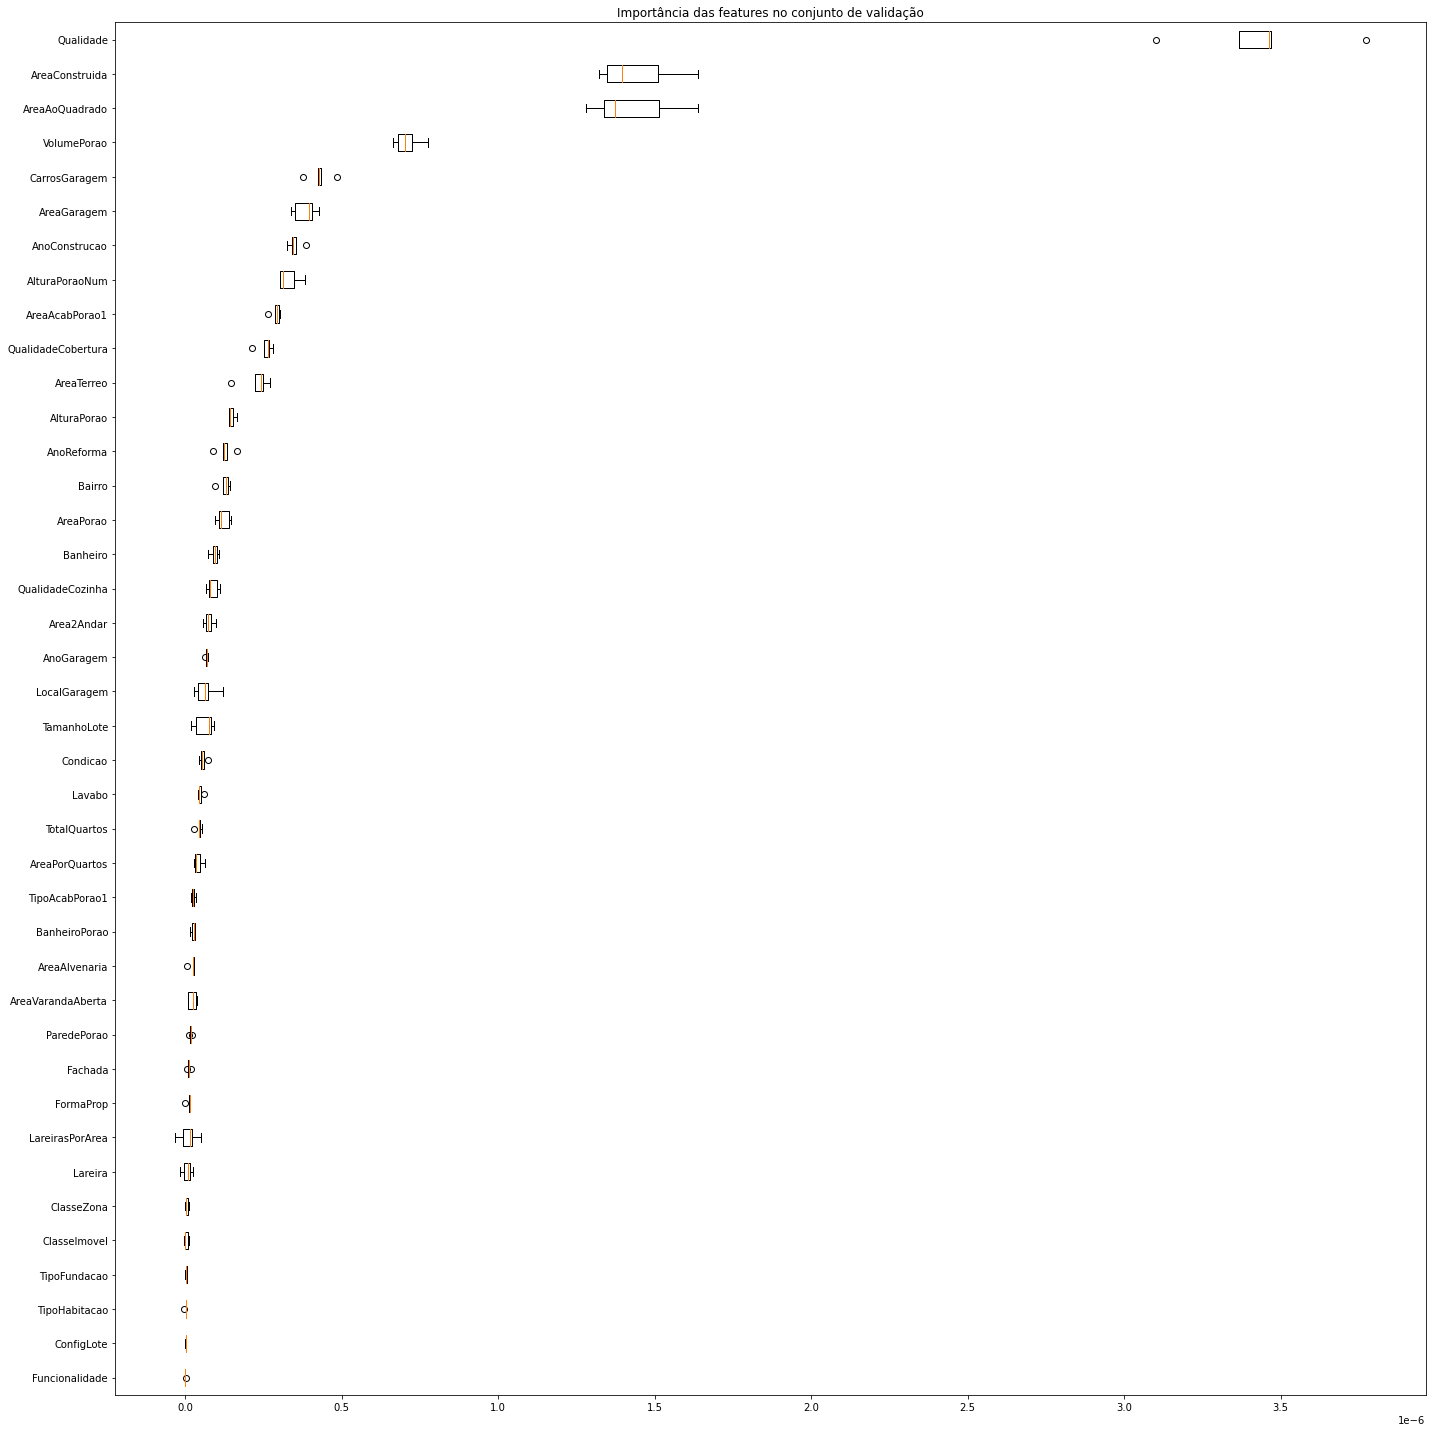

In [45]:
from sklearn.inspection import permutation_importance

res = permutation_importance(modelo, X_valid, y_valid)
indices = res.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20,20))
ax.boxplot(res.importances[indices[-40:]].T, vert=False, labels=X_valid.columns[indices[-40:]])
ax.set_title("Importância das features no conjunto de validação")
fig.tight_layout()
plt.show()

In [46]:
var_sel = list(X_valid.columns[indices[-40:]])
var_sel

['Funcionalidade',
 'ConfigLote',
 'TipoHabitacao',
 'TipoFundacao',
 'ClasseImovel',
 'ClasseZona',
 'Lareira',
 'LareirasPorArea',
 'FormaProp',
 'Fachada',
 'ParedePorao',
 'AreaVarandaAberta',
 'AreaAlvenaria',
 'BanheiroPorao',
 'TipoAcabPorao1',
 'AreaPorQuartos',
 'TotalQuartos',
 'Lavabo',
 'Condicao',
 'TamanhoLote',
 'LocalGaragem',
 'AnoGaragem',
 'Area2Andar',
 'QualidadeCozinha',
 'Banheiro',
 'AreaPorao',
 'Bairro',
 'AnoReforma',
 'AlturaPorao',
 'AreaTerreo',
 'QualidadeCobertura',
 'AreaAcabPorao1',
 'AlturaPoraoNum',
 'AnoConstrucao',
 'AreaGaragem',
 'CarrosGaragem',
 'VolumePorao',
 'AreaAoQuadrado',
 'AreaConstruida',
 'Qualidade']

Analisando as 10 variáveis consideradas mais importantes para o modelo, é interessante observar que algumas dessas condizem com a EDA realizada anteriormente. É o caso de "Qualidade", "AreaConstruida", "CarrosGaragem", "AreaGaragem", "AnoConstrucao", "AlturaPoraoNum" e "QualidadeCobertura". As outras três variáveis explicativas foram criadas após a EDA, o que de certa forma valida ou reforça as conclusões do estudo.

In [48]:
X_train_red = X_train[var_sel]

modelo = RandomForestRegressor(n_estimators=100, max_features=0.5)
modelo.fit(X_train_red, y_train)
y_pred = modelo.predict(X_valid[var_sel])
y_pred = np.exp(y_pred)

R_2 = r2_score(y_valid,y_pred)
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = mean_squared_error(y_valid,y_pred,squared=False)
    
metricas = metricas.append({'Modelo': 'permutation_importance',
                            'R^2': R_2,
                            'MAE': MAE, 
                            'MSE': MSE,
                            'RMSE': RMSE}, ignore_index=True)

metricas

,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744
1,n_est=10,0.898610,17126.408200,6.368314e+08,25235.518561
2,n_est=30,0.893243,17061.888096,6.705434e+08,25894.852967
3,n_est=50,0.903402,16345.777386,6.067317e+08,24631.923671
4,n_est=70,0.903097,16638.239383,6.086491e+08,24670.815431
5,n_est=100,0.908404,16049.849768,5.753175e+08,23985.776465
6,n_est=150,0.900792,16509.315661,6.231297e+08,24962.566213
7,n_est=200,0.904485,16477.185220,5.999353e+08,24493.576555
8,max_features=auto,0.903287,16503.229693,6.074591e+08,24646.686159
9,max_features=sqrt,0.899702,16383.713909,6.299723e+08,25099.249119


O valor obtido para o dataset com features selecionadas ainda foi inferior ao melhor encontrado anteriormente.

### Performance do modelo em um ambiente real

Por fim, o modelo será aplicado ao conjunto de teste para avaliar seu desempenho em dados nunca antes vistos, sendo essa uma estimativa da performance no mesmo em ambiente de produção:

In [50]:
y_test = np.exp(y_test)

In [53]:
modelo = RandomForestRegressor(n_estimators=100, max_features=0.5)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
y_pred = np.exp(y_pred)

R_2 = r2_score(y_valid,y_pred)
MAE = mean_absolute_error(y_valid,y_pred)
MSE = mean_squared_error(y_valid,y_pred)
RMSE = mean_squared_error(y_valid,y_pred,squared=False)
    
metricas = metricas.append({'Modelo': 'Dados de Teste',
                            'R^2': R_2,
                            'MAE': MAE, 
                            'MSE': MSE,
                            'RMSE': RMSE}, ignore_index=True)

metricas

,Modelo,R^2,MAE,MSE,RMSE
0,Baseline,0.905278,16403.525443,5.949497e+08,24391.590744
1,n_est=10,0.898610,17126.408200,6.368314e+08,25235.518561
2,n_est=30,0.893243,17061.888096,6.705434e+08,25894.852967
3,n_est=50,0.903402,16345.777386,6.067317e+08,24631.923671
4,n_est=70,0.903097,16638.239383,6.086491e+08,24670.815431
5,n_est=100,0.908404,16049.849768,5.753175e+08,23985.776465
6,n_est=150,0.900792,16509.315661,6.231297e+08,24962.566213
7,n_est=200,0.904485,16477.185220,5.999353e+08,24493.576555
8,max_features=auto,0.903287,16503.229693,6.074591e+08,24646.686159
9,max_features=sqrt,0.899702,16383.713909,6.299723e+08,25099.249119


In [57]:
y_test.describe()

count       219.000000
mean     174313.753425
std       87436.992793
min       55993.000000
25%      127600.000000
50%      150000.000000
75%      194500.000000
max      755000.000000
Name: PrecoVendaLog, dtype: float64

O modelo teve um comportamento interessante nos dados de treino, apresentando métricas compatíveis com aquelas observadas no conjunto de validação. A métrica RMSE de aproximadamente 23739.62 reais pode ser considerada boa, dado que a média dos preços de imóveis na base de teste é de 174313.75 reais e seu desvio padrão de 87436.99 reais Além disso, 75\% dos valores de imóveis estão acima de 127600.00 reais e o valor mínimo é de 55993.00 reais, ambos acima do erro encontrado.

## Conclusões

O desafio foi bastante interessante e proporcionou diversos insights. Através da análise exploratória de dados foi possível obter uma boa intuição das variáveis explicativas mais importantes para o modelo. As features criadas também se mostraram eficazes, sendo consideradas importantes pelo "permutation_importance" da biblioteca scikit-learn. Através da otimização de hiperparâmetros, foi possível melhorar ainda mais a performance do modelo. Contudo, algumas dúvidas precisam ser respondidas:

1) O modelo do objetivo 1 atende ao pressuposto de resíduos seguindo uma distribuição normal?

2) Aplicando o one hot encode às variáveis nominais do objetivo 2, o resultado seria melhor? Como fazer isso?

3) Por que o modelo não apresentou melhores resultados ao selecionar as features mais importantes? Os resultados apresentam certa variabilidade para os mesmos hiperparâmetros?

As conclusões serão atualizadas à medida que forem respondidas.